In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_alignment
import os

In [2]:
os.environ['CUDA_VISIBLE_DEVICES']='3'

In [3]:
padding_ratio = 1
input_ratio = 0.3

In [4]:
class marker():
    def __init__(self):
        self.fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)
    def get_pred(self,input):
        return self.fa.get_landmarks(input)

In [5]:
def pad(img,padding_ratio):
    h,w,_ = img.shape
    h,w = (int(h*padding_ratio),int(w*padding_ratio))
    return cv2.copyMakeBorder(img,h,h,w,w,cv2.BORDER_CONSTANT)

In [13]:
img_path = '/DATA5_DB8/data/zdcheng/hyperthyreosis_eye/selected/2P4A6336.JPG'

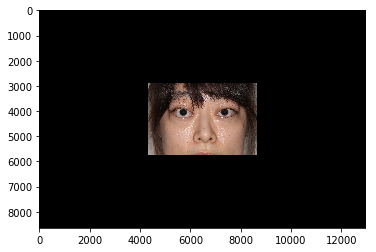

In [14]:
img = cv2.imread(img_path)
img_padded = pad(img,padding_ratio)
img_padded_RGB = cv2.cvtColor(img_padded, cv2.COLOR_BGR2RGB)
plt.imshow(img_padded_RGB)

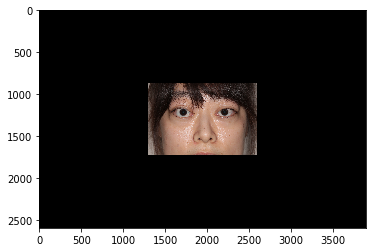

In [15]:
padded_h,padded_w,_ = img_padded_RGB.shape
input_h,input_w = int(padded_h*input_ratio),int(padded_w*input_ratio)
input_RGB = cv2.resize(img_padded_RGB,(input_w,input_h))
plt.imshow(input_RGB)

In [16]:
m = marker()
pred = m.get_pred(input_RGB)[0]

In [17]:
added_h,added_w = int(img.shape[0]*padding_ratio),int(img.shape[1]*padding_ratio)
pred_ori = pred/input_ratio
pred_ori[:,0] = pred_ori[:,0] - added_w
pred_ori[:,1] = pred_ori[:,1] - added_h

In [18]:
full_out = cv2.cvtColor(input_RGB,cv2.COLOR_RGB2BGR)
ori_out = img.copy()

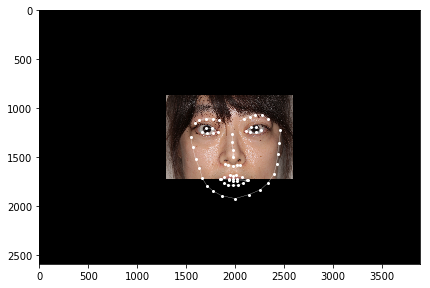

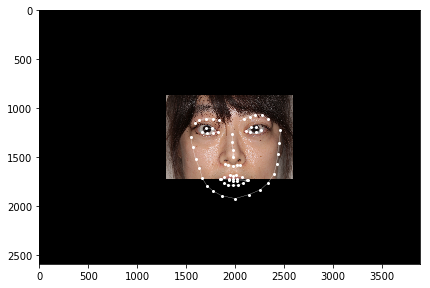

In [19]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(input_RGB)
ax1.plot(pred[0:17,0],pred[0:17,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[17:22,0],pred[17:22,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[22:27,0],pred[22:27,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[27:31,0],pred[27:31,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[31:36,0],pred[31:36,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[36:42,0],pred[36:42,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[42:48,0],pred[42:48,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[48:60,0],pred[48:60,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred[60:68,0],pred[60:68,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
fig

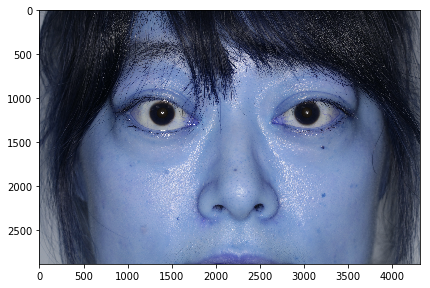

In [20]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)

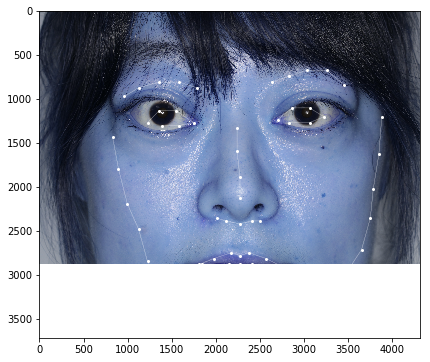

In [21]:
ax1.plot(pred_ori[0:17,0],pred_ori[0:17,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[17:22,0],pred_ori[17:22,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[22:27,0],pred_ori[22:27,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[27:31,0],pred_ori[27:31,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[31:36,0],pred_ori[31:36,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[36:42,0],pred_ori[36:42,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[42:48,0],pred_ori[42:48,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[48:60,0],pred_ori[48:60,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
ax1.plot(pred_ori[60:68,0],pred_ori[60:68,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25)
fig